In [716]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [822]:
df = web.DataReader('ITC.NS', data_source='yahoo', start='2020-01-01', end='2022-05-01')
# df

In [823]:
# df

In [824]:
df.shape


(579, 6)

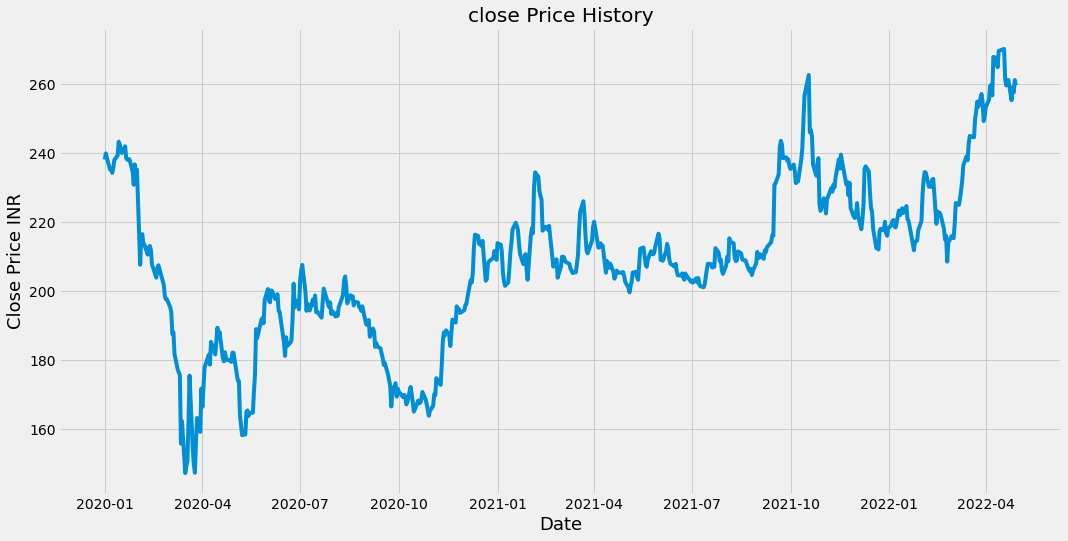

In [825]:
#visualise the closing price
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [826]:
#Create a new dataframe with only close column
data = df.filter(['Close'])
dataset = data.values #converting to numpy array
#get the no of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

464

In [827]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# scaled_data

In [828]:
len(scaled_data)

579

In [829]:
#Create the training dataset
#Create the scaled training dataset

train_data = scaled_data[0: training_data_len, :]
#Split the data into X_train and Y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0 ])
    y_train.append(train_data[i, 0])
#     if i<= 60:
#         print(x_train)
#         print(y_train)
#         print()

In [830]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(404, 60)

In [831]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #(1345, 60, 1)
x_train.shape

(404, 60, 1)

In [832]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #(60, 1)

model.add(LSTM(50, return_sequences=False, ))
model.add(Dense(25))
model.add(Dense(1))

In [833]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [834]:
#train the model

model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 75ms/step - loss: 0.0828
Epoch 2/100
7/7 [==============================] - 0s 69ms/step - loss: 0.0192
Epoch 3/100
7/7 [==============================] - 1s 71ms/step - loss: 0.0122
Epoch 4/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0079
Epoch 5/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0071
Epoch 6/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0064
Epoch 7/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0058
Epoch 8/100
7/7 [==============================] - 1s 70ms/step - loss: 0.0055
Epoch 9/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0053
Epoch 10/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0051
Epoch 11/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0049
Epoch 12/100
7/7 [==============================] - 1s 71ms/step - loss: 0.0049
Epoch 13/100
7/7 [==============================]

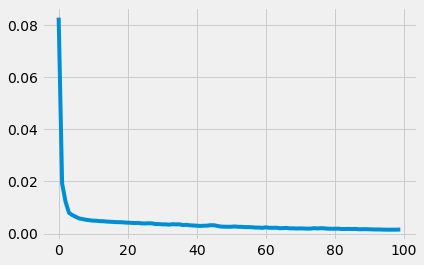

In [835]:
loss = model.history.history['loss']
plt.plot(loss)

In [836]:
#Create the testing data set

#Create a new array containing scaled values from index 1345 to end

test_data = scaled_data[training_data_len - 60 : , :]

#create the datasets x_test and y_test

x_test = []
y_test = dataset[training_data_len: , :] #this will contain the actual values

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60: i, 0])

In [837]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [838]:
#Reshape the datra
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [839]:
#get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #we want predictions to contain the same values as y_test dataset



In [840]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

4.836875185759172

<ipython-input-841-e1db9ab83fe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


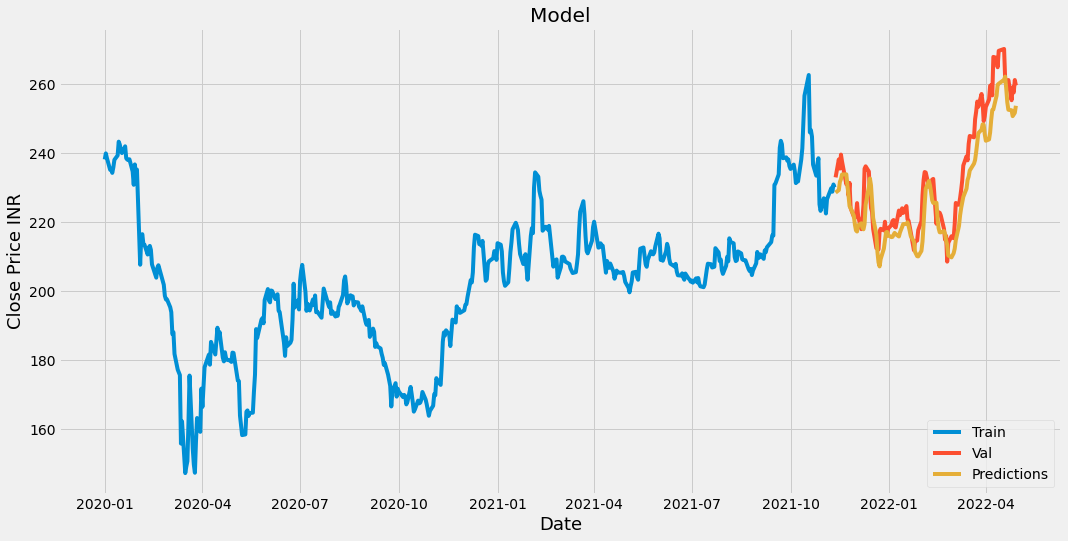

In [841]:
#Plot the data
train = data[0: training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions

#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [842]:
#Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2021-11-12,232.899994,228.489136
2021-11-15,238.100006,229.225174
2021-11-16,235.449997,231.593582
2021-11-17,239.500000,232.368469
2021-11-18,237.500000,233.751099
...,...,...
2022-04-25,255.250000,252.334518
2022-04-26,258.950012,250.639664
2022-04-27,257.500000,251.107452


In [845]:
#try and predict closing price at may 02 2022
quote = web.DataReader('ITC.NS', data_source='yahoo', start='2012-01-01', end='2022-05-02')
#create new dataframe

new_df = quote.filter(['Close'])

#get last 60day closing price values and convert the dataframe to an array
last_60_days = new_df[-60: ].values


#scale the data
last_60_days_scaled = scaler.transform(last_60_days)

x_test1 = []
x_test1.append(last_60_days_scaled)

#convert x_test to numpy array
x_test1 = np.array(x_test1)

#reshape
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))
# print(x_test)

# print(x_test)
#get the predicted scaled price
pred_price = model.predict(x_test1)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[256.32684]]


In [844]:
quote2 = web.DataReader('ITC.NS', data_source='yahoo', start='2022-05-04', end='2022-05-04')
print(quote2['Close'])

Date
2022-05-04    259.75
Name: Close, dtype: float64


In [813]:
dataa = web.DataReader('DBREALTY.NS', data_source='yahoo', start='2012-01-01', end='2022-05-02')

close = dataa.filter(['Close'])
last_60_days = close[-60: ].values
last_60_days_scaled = scaler.transform(last_60_days)
x_input = []
x_input.append(last_60_days_scaled)
x_input = np.array(x_input)
x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))
  
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


[[93.13792]]


In [222]:
close2 = close.tail(60)


In [223]:
# x_test

In [814]:
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<30):
    
    if(len(temp_input)>60):
        x_input=np.array(temp_input[1:], dtype=object).astype("float32")
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
#         print(x_input)
#         print(yhat)
        temp_input.append(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        #print(temp_input)
        
        lst_output.append(yhat[0].tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
#         print(x_input)
#         print(yhat)
        temp_input.append(yhat[0].tolist())
        lst_output.append(yhat[0].tolist())
        i=i+1

In [201]:
# lst_output

In [115]:
lst_output = scaler.inverse_transform(lst_output)

In [262]:
# lst_output

In [815]:
plot_new = np.arange(1, 101)
plot_pred = np.arange(101, 131)

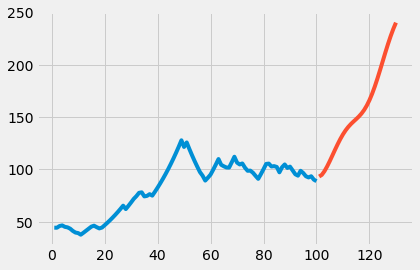

In [816]:
plt.plot(plot_new , scaler.inverse_transform(scaled_data[479:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))

In [686]:
ds_new = scaled_data.tolist()

In [687]:
len(scaled_data)

579

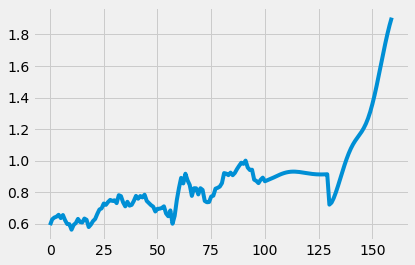

In [817]:
ds_new.extend(lst_output)
plt.plot(ds_new[479: ])

In [818]:
final_graph = scaler.inverse_transform(ds_new).tolist()

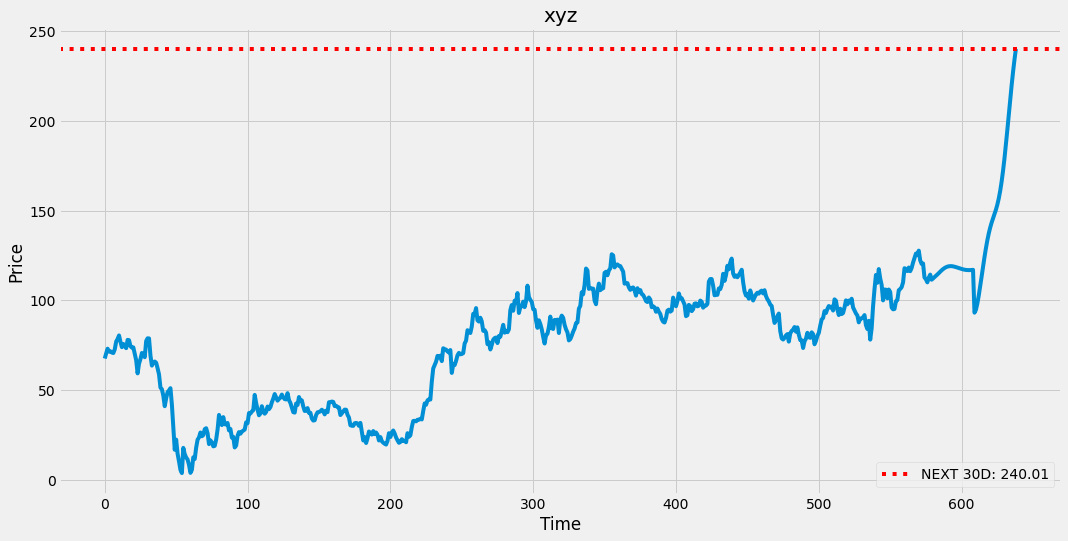

In [819]:
plt.figure(figsize=(16,8))
plt.plot(final_graph, )

plt.ylabel("Price")
plt.xlabel("Time")
plt.title("xyz")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()


In [211]:
# list1 = dataa2 + lst_output


In [366]:
model.save('ITC2.h5')

In [251]:
current = []
next30 = []
symbol = []

#Axis
data = web.DataReader('AXISBANK.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("AXISBANK")

data = web.DataReader('BPCL.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("BPCL")

data = web.DataReader('ITC.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("ITC")

data = web.DataReader('TITAN.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("TITAN")

data = web.DataReader('WIPRO.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("WIPRO")


print(current)
print(next30)
print(symbol)



[750, 342, 215, 2593, 555]
[793, 379, 270, 2461, 559]
['AXISBANK', 'BPCL', 'ITC', 'TITAN', 'WIPRO']


In [256]:
def findP(current, next30):
    p = []
    for i in range(len(current)):
        inc = ((next30[i] - current[i]) / current[i]) * 100
        p.append(round(inc, 1))
        
    return p

In [257]:
ans = findP(current, next30)
print(ans)

[5.7, 10.8, 25.6, -5.1, 0.7]


In [847]:

def yearly(symbol, start_year):
    import statistics
    percentages = []
    for i in range(start_year, 2022):
        data = web.DataReader(f"{symbol}.NS", data_source='yahoo', start=f'{i}-01-01', end=f'{i}-12-31')
        data = data['Close']
        percentage_inc = ((data[len(data) - 1] - data[0]) / data[0]) * 100
        percentages.append(percentage_inc)
        
    
    return statistics.fmean(percentages)
        
        



In [848]:
symbols = ['AXISBANK', 'BPCL', 'ITC', 'HINDUNILVR', 'COALINDIA', 'ASIANPAINT', 'WIPRO', 'TECHM', 'HEROMOTOCO', 'CIPLA', 'RELIANCE','HINDALCO', 'NESTLEIND', 'BHARTIARTL', 'TCS', 'ONGC']

avg_inc_5y = []
avg_inc_10y = []
index = []

for i in range(len(symbols)):
    avg_inc_10y.append(yearly(symbols[i], 2012))
    
    avg_inc_5y.append(yearly(symbols[i], 2017))
    

print(avg_inc_10y)
print(avg_inc_5y)



    

[19.716022195962758, 21.406139636123463, 6.119890773694583, 21.139191716757697, -6.056964676487557, 30.608961946762044, 20.522642396492667, 33.998616423070246, 5.47611494366027, 14.16692400771014, 22.642841682640537, 23.75461639876866, 18.525326535911407, 11.254367301648143, 22.164762430739582, 1.0782703577490962]
[9.486513509473767, 0.9719351756197684, -1.9087238724276445, 26.076924246725998, -12.550032762899864, 30.861984007768854, 35.677714221906115, 32.765446720279016, -1.3967261875930141, 14.079724378815897, 35.99683962147297, 32.88653079717078, 27.636024200936276, 26.011140540327858, 26.16855428852932, -1.6003915160816935]


In [853]:
avg_inc_10y = [19.716022195962758, 21.406139636123463, 6.119890773694583, 21.139191716757697, -6.056964676487557, 30.608961946762044, 20.522642396492667, 33.998616423070246, 5.47611494366027, 14.16692400771014, 22.642841682640537, 23.75461639876866, 18.525326535911407, 11.254367301648143, 22.164762430739582, 1.0782703577490962]
avg_inc_5y = [9.486513509473767, 0.9719351756197684, -1.9087238724276445, 26.076924246725998, -12.550032762899864, 30.861984007768854, 35.677714221906115, 32.765446720279016, -1.3967261875930141, 14.079724378815897, 35.99683962147297, 32.88653079717078, 27.636024200936276, 26.011140540327858, 26.16855428852932, -1.6003915160816935]
symbols = ['AXISBANK', 'BPCL', 'ITC', 'HINDUNILVR', 'COALINDIA', 'ASIANPAINT', 'WIPRO', 'TECHM', 'HEROMOTOCO', 'CIPLA', 'RELIANCE','HINDALCO', 'NESTLEIND', 'BHARTIARTL', 'TCS', 'ONGC']

print("Current Nifty50 Stocks with average increase > 15% (last 10 years): ")

stocks_10y = []
stocks_5y = []
for i in range(len(avg_inc_10y)):
    if(round(avg_inc_10y[i]) > 15):
        stocks_10y.append(symbols[i])
        print(symbols[i])
        
print("\nCurrent Nifty50 Stocks with average increase > 15% (last 5 years): ")

for i in range(len(avg_inc_5y)):
    if(round(avg_inc_5y[i]) > 15):
        stocks_5y.append(symbols[i])
        print(symbols[i])
        
stocks_10y = set(stocks_10y)
stocks_5y = set(stocks_5y)

common = stocks_10y.intersection(stocks_5y)

print("\nStocks Recommended on the basis of above results: ")
print(common)

Current Nifty50 Stocks with average increase > 15% (last 10 years): 
AXISBANK
BPCL
HINDUNILVR
ASIANPAINT
WIPRO
TECHM
RELIANCE
HINDALCO
NESTLEIND
TCS

Current Nifty50 Stocks with average increase > 15% (last 5 years): 
HINDUNILVR
ASIANPAINT
WIPRO
TECHM
RELIANCE
HINDALCO
NESTLEIND
BHARTIARTL
TCS

Stocks Recommended on the basis of above results: 
{'HINDUNILVR', 'WIPRO', 'HINDALCO', 'NESTLEIND', 'RELIANCE', 'ASIANPAINT', 'TECHM', 'TCS'}


In [ ]:
GAIL
4th may
Pred: 156.83594
Close: 157.550003

5th may
Pred: 157.64406
    
    
BPCL
4th may
Pred: 364.04053
Close: 363.450012
    
5th may
Pred: 364.9819
    
ONGC
4th may
Pred: 160.09445
Close: 162.25
    
5th may
Pred: 159.34549
    
CIPLA
4th may
Pred: 971.744
Close: 957.54
    
5th may
Pred: 969.7329
    
    
ITC
4th may
Pred: 256.57108
Close: 259.75
    
5th may
Pred: 256.32684
